In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
from ipywidgets import widgets
import cv2 as cv

In [59]:
def plot_polygon(xy):
    fig = plt.figure()

    ax = fig.add_subplot()
    ax.add_patch(Polygon(xy, fc = 'none', ec = 'b', lw = 2))

    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    

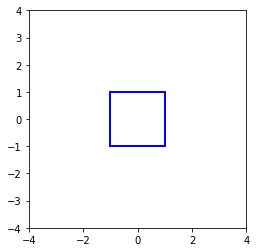

In [60]:
Points = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1]])
plot_polygon(Points)

# Rigid Body transformation

In [189]:
def rigid_body_transform(theta, translate_x, translate_y):
    translate = np.array([translate_x, translate_y])
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rbt_matrix = np.column_stack((rotation_matrix, translate))
    rbt_matrix = np.row_stack((rbt_matrix, np.array([0,0, 1])))

    Points_h = np.column_stack((Points, np.array([1, 1, 1, 1])))

    transformed_points_h = np.matmul(rbt_matrix, Points_h.T).T

    transformed_points = transformed_points_h[:, :2]
    
    plot_polygon(transformed_points)
    
    return transformed_points

    
style = {'description_width': 'initial'}

_ = widgets.interact(rigid_body_transform, 
                 theta = widgets.FloatSlider(value = 0, min = 0, max = np.pi, description = 'theta'),
                      translate_x = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'x'),
                      translate_y = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'y'),
                     style = style)

interactive(children=(FloatSlider(value=0.0, description='theta', max=3.141592653589793), FloatSlider(value=0.…

# Similarity

In [190]:
def  similarity_transform(theta, scale, translate_x, translate_y):
    translate = np.array([translate_x, translate_y])
    rotation_matrix = np.array([[scale * np.cos(theta), scale * -np.sin(theta)], [scale * np.sin(theta), scale * np.cos(theta)]])
    rbt_matrix = np.column_stack((rotation_matrix, translate))
    rbt_matrix = np.row_stack((rbt_matrix, np.array([0,0, 1])))

    Points_h = np.column_stack((Points, np.array([1, 1, 1, 1])))

    transformed_points_h = np.matmul(rbt_matrix, Points_h.T).T

    transformed_points = transformed_points_h[:, :2]
    
    plot_polygon(transformed_points)
    
    return transformed_points

    
style = {'description_width': 'initial'}

_ = widgets.interact(similarity_transform, 
                 theta = widgets.FloatSlider(value = 0, min = -np.pi, max = np.pi, description = 'theta'),
                        scale = widgets.FloatSlider(value = 1, min = 1, max = 2, description = 'scale'),
                      translate_x = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'x'),
                      translate_y = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'y'),
                     style = style)

interactive(children=(FloatSlider(value=0.0, description='theta', max=3.141592653589793, min=-3.14159265358979…

# Affine

In [191]:
def  affine_transform(theta, scale, sh_x, sh_y, translate_x, translate_y):
    translate = np.array([translate_x, translate_y])
    rotation_matrix = np.array([[scale * np.cos(theta), scale * -np.sin(theta)], [scale * np.sin(theta), scale * np.cos(theta)]])
    t_matrix = np.column_stack((rotation_matrix, translate))
    t_matrix = np.row_stack((t_matrix, np.array([0,0, 1])))
    
    shear_matrix = np.array([[1, sh_x, 0], [sh_y, 1, 0], [0, 0, 1]])
    
    t_matrix = np.matmul(t_matrix, shear_matrix)
                            
    Points_h = np.column_stack((Points, np.array([1, 1, 1, 1])))

    transformed_points_h = np.matmul(t_matrix, Points_h.T).T

    transformed_points = transformed_points_h[:, :2]
    
    plot_polygon(transformed_points)
    
    return transformed_points

    
style = {'description_width': 'initial'}

_ = widgets.interact(affine_transform, 
                 theta = widgets.FloatSlider(value = 0, min = -np.pi, max = np.pi, description = 'theta'),
                        scale = widgets.FloatSlider(value = 1, min = 1, max = 2, description = 'scale'),
                        sh_x = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'sh_x'),
                        sh_y = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'sh_y'),
                        translate_x = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'x_translate'),
                        translate_y = widgets.FloatSlider(value = 0, min = -2, max = 2, description = 'y_translate'),
                        style = style)

interactive(children=(FloatSlider(value=0.0, description='theta', max=3.141592653589793, min=-3.14159265358979…

# Projective matrix

In [192]:
def  projective_transform(h1, h2, h3, h4, h5, h6, h7, h8):
    
    t_matrix = np.array([[h1, h2, h3], [h4, h5, h6], [h7, h8, 1]])
    
                            
    Points_h = np.column_stack((Points, np.array([1, 1, 1, 1])))

    transformed_points_h = np.matmul(t_matrix, Points_h.T).T
    transformed_points_h = (transformed_points_h.T / transformed_points_h[:, 2]).T
    transformed_points = transformed_points_h[:, :2]
    
    
    plot_polygon(transformed_points)
    
    return transformed_points

    
style = {'description_width': 'initial'}

_ = widgets.interact(projective_transform, 
                        h1 = widgets.FloatSlider(value = 1, min = 0, max = 2, description = 'h1'),
                        h2 = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'h2'),
                        h3 = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'h3'),
                        h4 = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'h4'),
                        h5 = widgets.FloatSlider(value = 1, min = 0, max = 2, description = 'h5'),
                        h6 = widgets.FloatSlider(value = 0, min = 0, max = 2, description = 'h6'),
                        h7 = widgets.FloatSlider(value = 0, min = -1, max = 1, description = 'h7'),
                        h8 = widgets.FloatSlider(value = 0, min = -1, max = 1, description = 'h8'),
                        style = style)

interactive(children=(FloatSlider(value=1.0, description='h1', max=2.0), FloatSlider(value=0.0, description='h…

# length, angle and parallelism check

In [206]:
def compute_length(points):
    adj_points = np.roll(points, -1, axis = 0)
    lengths = np.linalg.norm(points - adj_points, axis = 1)
    return lengths
    
def compute_angle(points):
    angles = np.zeros(points.shape[0])
    for i in range(points.shape[0]):
        point = points[i]
        adj1 = points[i - 1]
        adj2 = points[(i + 1) % 4]
        
        vector1 = point - adj1
        vector2 = point - adj2
        
        angle = np.arccos(np.inner(vector1, vector2) / np.linalg.norm(vector1) / np.linalg.norm(vector2))
        angles[i] = angle * 180 / np.pi
    return angles
    

    

In [215]:
def compare_lengths(points1, points2):
    lengths1 = compute_length(points1)
    lengths2 = compute_length(points2)
    print(lengths1, lengths2)
    
    if np.all(lengths1 == lengths2):
        return True
    return False

def compare_angles(points1, points2):
    angles1 = compute_angle(points1)
    angles2 = compute_angle(points2)
    
    print(angles1, angles2)
    
    if np.all(angles1 == angles2):
        return True
    return False

def check_parallelism(points1, points2):
    line11 = points1[0] - points1[1]
    line12 = points1[1] - points1[2]
    line13 = points1[2] - points1[3]
    line14 = points1[3] - points1[0]
    
    line21 = points2[0] - points2[1]
    line22 = points2[1] - points2[2]
    line23 = points2[2] - points2[3]
    line24 = points2[3] - points2[0]
    
    angle11 = np.arccos(np.inner(line11, line13) / np.linalg.norm(line11) / np.linalg.norm(line13) )
    angle12 = np.arccos(np.inner(line12, line14) / np.linalg.norm(line12) / np.linalg.norm(line14) )
    
    angle21 = np.arccos(np.inner(line21, line23) / np.linalg.norm(line21) / np.linalg.norm(line23) )
    angle22 = np.arccos(np.inner(line22, line24) / np.linalg.norm(line22) / np.linalg.norm(line24) )
    
    if angle11 == angle12 and angle21 == angle22:
        return True
    return False
    
    

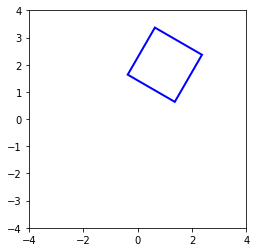

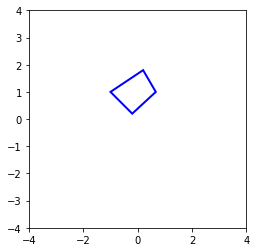

In [197]:
original_points = Points

rigid_body_points = rigid_body_transform(np.pi / 3, 1, 2)
projective_points = projective_transform(0.5, 0.3, 0, 0.5, -0.3, 1, 0.1, 0.1)

In [217]:
print(compare_lengths(original_points, rigid_body_points))
print(compare_lengths(original_points, projective_points))

[2. 2. 2. 2.] [2. 2. 2. 2.]
True
[2. 2. 2. 2.] [1.13137085 1.17945373 0.92616293 1.44222051]
False


In [218]:
print(compare_angles(original_points, rigid_body_points))
print(compare_angles(original_points, projective_points))

[90. 90. 90. 90.] [90. 90. 90. 90.]
True
[90. 90. 90. 90.] [ 78.69006753  92.29061004 102.45295279  86.56636964]
False


In [216]:
print(check_parallelism(original_points, rigid_body_points))
print(check_parallelism(original_points, projective_points))

True
False
